# Custom Layers in Keras

# Task 1: Importing Libraries

In [1]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.1.0


# Task 2: Import and Visualize Dataset

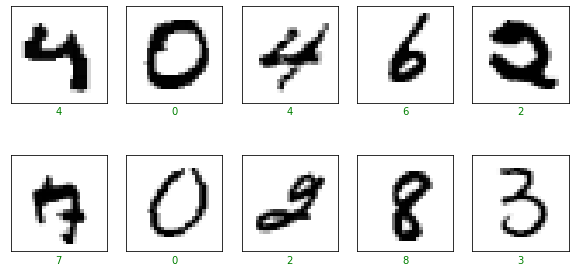

In [2]:
(x_train,y_train),(x_test,y_test) = utils.load_data()
utils.plot_random_examples(x_train,y_train).show()

# Task 3: Creating a Custom Layer

In [3]:
class ParametericRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametericRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.alpha = self.add_weight(name='alpha',shape=(1,), initializer='zeros', trainable=True)
        super(ParametericRelu, self).build(input_shape)
        
    def call(self, x):
        return tf.maximum(0., x) + self.alpha * tf.minimum(0. ,x)

# Task 4: Creating the Model

In [4]:
def create_model(use_prelu=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape = (784,)))
    if use_prelu:
        model.add(ParametericRelu())
    else:
        model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
parameteric_relu (Parameteri (None, 64)                1         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


# Task 5: Model Training

In [6]:
print('Initial Alpha: ', model.layers[1].get_weights())
h = model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=5)

Initial Alpha:  [array([0.], dtype=float32)]
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2846 - accuracy: 0.9211 - val_loss: 0.1405 - val_accuracy: 0.9575
Epoch 2/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1204 - accuracy: 0.9641 - val_loss: 0.1067 - val_accuracy: 0.9654
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0857 - accuracy: 0.9741 - val_loss: 0.0883 - val_accuracy: 0.9729
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0669 - accuracy: 0.9798 - val_loss: 0.0872 - val_accuracy: 0.9712
Epoch 5/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0552 - accuracy: 0.9831 - val_loss: 0.0970 - val_accuracy: 0.9703


In [7]:
print("final alpha: ", model.layers[1].get_weights())

final alpha:  [array([-0.9069034], dtype=float32)]


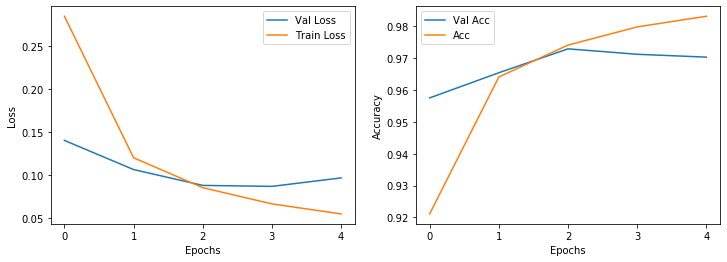

In [8]:
utils.plot_results(h).show()

# Task 6: Comparison with ReLU

In [9]:
model = create_model(use_prelu = False)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
h =  model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3053 - accuracy: 0.9125 - val_loss: 0.1793 - val_accuracy: 0.9478
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1502 - accuracy: 0.9556 - val_loss: 0.1267 - val_accuracy: 0.9636
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1094 - accuracy: 0.9679 - val_loss: 0.1101 - val_accuracy: 0.9669
Epoch 4/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0877 - accuracy: 0.9742 - val_loss: 0.0928 - val_accuracy: 0.9709
Epoch 5/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0722 - accuracy: 0.9781 - val_loss: 0.0982 - val_accuracy: 0.9701


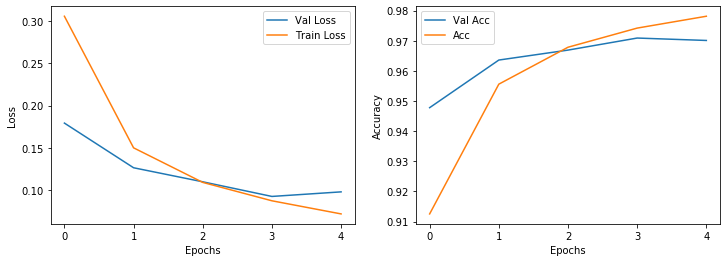

In [11]:
utils.plot_results(h).show()